# Part I - (Ford-GoBike Analysis For February 2019)
## by (Agunoweh Timiebi)

## Introduction
> This document explores a dataset containing the trip data of the fordgo bike for San Fransicsco Bay Area for the month of February 2019.

## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nbconvert as nb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
#import dataset
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#check and remove NaN and irrelevant columns/features
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.head(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
95,815,2019-02-28 23:00:41.3160,2019-02-28 23:14:17.2110,53.0,Grove St at Divisadero,133.0,Valencia St at 22nd St,5454,Subscriber,1994.0,Male,No
96,229,2019-02-28 23:09:20.1610,2019-02-28 23:13:10.0550,317.0,San Salvador St at 9th St,296.0,5th St at Virginia St,4014,Subscriber,1996.0,Male,Yes
97,497,2019-02-28 23:04:52.1830,2019-02-28 23:13:09.7370,219.0,Marston Campbell Park,219.0,Marston Campbell Park,5879,Subscriber,1992.0,Female,Yes
98,549,2019-02-28 23:03:47.2740,2019-02-28 23:12:56.3920,274.0,Oregon St at Adeline St,258.0,University Ave at Oxford St,828,Customer,1994.0,Male,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [7]:
#changing data type to appropriate data types and replacing NaN values
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['day'] = df['start_time']. dt. day_name()
mean_value=df['member_birth_year'].mean()
df['member_birth_year'].fillna(value=mean_value, inplace=True)
df["member_gender"].fillna("Male", inplace = True)
df["member_birth_year"] = df["member_birth_year"].astype(int)
df['Age'] = 2022 - df['member_birth_year']
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
day                                object
Age                                 int32
dtype: object

In [8]:
#checking for unrealistic ages
df.Age.describe()

count    183412.000000
mean         37.229903
std           9.887534
min          21.000000
25%          30.000000
50%          35.000000
75%          41.000000
max         144.000000
Name: Age, dtype: float64

In [9]:
#filtering out unrealistic age for a bike user
mask= df['Age'] < 90
df[mask]
df=df[mask]

In [10]:
#checking the content of the columns
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,38
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1984,Male,No,Thursday,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,48


In [11]:
# Check duplicated row
df.duplicated().sum()

0

In [12]:
#descriptive statistics of numerical values in the dataset
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,Age
count,183245.000000,183048.000000,183048.000000,183245.000000,183245.000000,183245.000000
mean,726.359208,138.601230,136.279479,4472.703785,1984.831417,37.168583
std,1795.141520,111.779018,111.529191,1664.376609,9.670130,9.670130
min,61.000000,3.000000,3.000000,11.000000,1933.000000,21.000000
25%,325.000000,47.000000,44.000000,3777.000000,1981.000000,30.000000
50%,514.000000,104.000000,100.000000,4957.000000,1987.000000,35.000000
75%,796.000000,239.000000,235.000000,5502.000000,1992.000000,41.000000
max,85444.000000,398.000000,398.000000,6645.000000,2001.000000,89.000000


In [13]:
#checking the structure of the dataset
df.shape

(183245, 14)

### What is the structure of your dataset?

> 
The current data set of interest is organised into 183245 records spread across 15 features and consists of 1 "csv" file,representing bike sharing information for the month of february.

### What is/are the main feature(s) of interest in your dataset?

> 
1. What is the average length of a trip?
2. What is relationship between the trip duration and other variables?
3. What effect do the preceding insights have on whether a user is a subscriber or a customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Start Time and Date, End Time and Date, Trip Duration (seconds), User Type, Member Year of Birth, Member Gender.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 



#### What is the average length of a trip?

In [14]:
#Define a function for plot labels
def label(x,y,t):
    """
    Args:
    x (str): x-axis title
    y (str): y-axis title
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

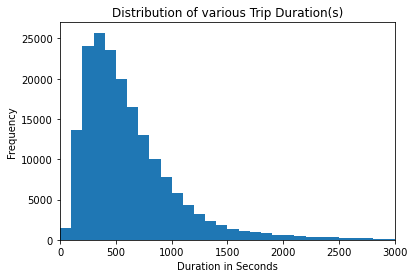

In [15]:
# Here we plot the distribution of trip durations.

binedges = np.arange(0, df['duration_sec'].max() + 100 , 100)
plt.hist(data = df , x = 'duration_sec' , bins = binedges)
plt.xlim(0,3000)
label('Duration in Seconds','Frequency','Distribution of various Trip Duration(s)')

- We can see that the plot above is right-screwed, with a lengthy tail on the right. We can see from the plot that most trip duration is less than 2000 seconds and 600 to 750 seconds appear to be the average trip dureation for bikers. The x-axis will then be transformed using a logarithmic transformation.

- The above plot was quite difficult to visualise; in order to remedy this, the bin-width was extended to 100. Because it appears absurd to measure travel time in seconds, we change "duration_sec" to "duration_min" before doing any logarithmic transformations.


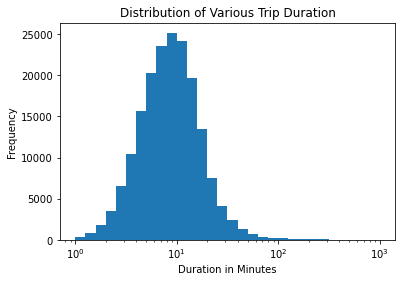

In [24]:
# trip durations from seconds to minutes 
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.xscale('log');
label('Duration in Minutes','Frequency','Distribution of Various Trip Duration')

> From the plot shown above, it is clear that most people prefer to use bicycles for short-distance journeys (around 12 mins).

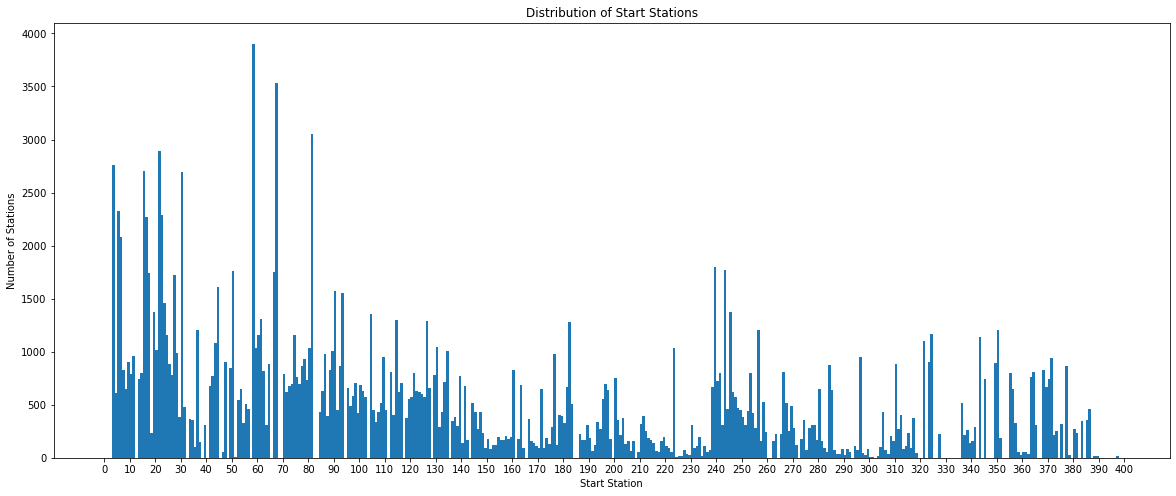

In [25]:
# Plotting start station id distribution.
binsize = 1
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
label('Start Station','Number of Stations','Distribution of Start Stations')

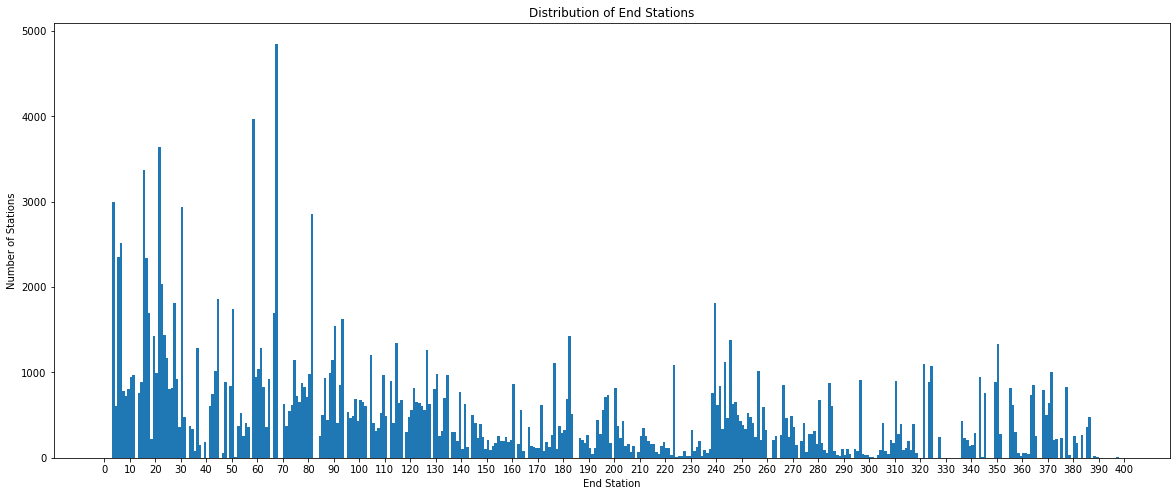

In [26]:
# Plotting end station id distribution.
binsize = 1
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
label('End Station','Number of Stations','Distribution of End Stations')

> As we can see, the same stations appear more frequently as start and end stations.

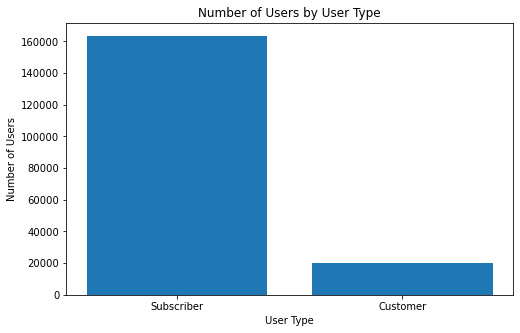

In [27]:
# plotting types of users on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
label('User Type','Number of Users','Number of Users by User Type')

> Overall, there are more subscribers than customers using the bike sharing service.

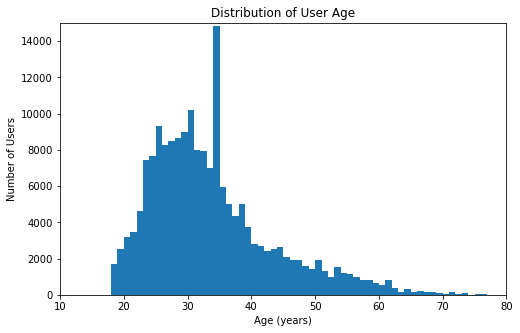

In [29]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 15000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
label('Age (years)','Number of Users','Distribution of User Age')

> It is clear that the distribution is weighted more between the ages of 20 and 40.

<AxesSubplot:title={'center':'Number of Users by Gender'}, xlabel='member_gender', ylabel='count'>

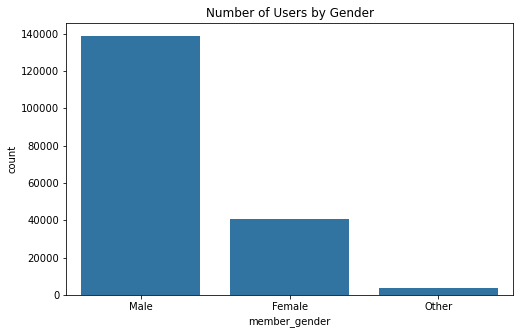

In [30]:
# plotting genders on countplot.
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
member_type = ['Male', 'Female', 'Other']
plt.title('Number of Users by Gender')
sb.countplot(data=df, x='member_gender', order=member_type, color=base_color)

> The service obviously has more of male patronage than female.

<AxesSubplot:title={'center':'Daily Usage Service'}, xlabel='day', ylabel='count'>

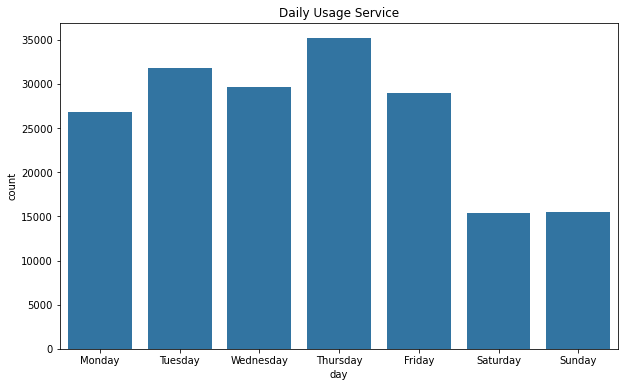

In [31]:
# Countplot bike usage based on weekday
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,6))
plt.title('Daily Usage Service')
sb.countplot(data=df, x='day', order=day_name, color=base_color)

> Thursday appears to be the day with most users of the service followed closely by tuesday, wednesday and friday.

#### Exploring Stations

- start vs end, distance

In [120]:
df.start_station_name.nunique()

329

> The San Francisco Bay region has 329 stations, according to the above data.

### Top ten most used stations

<AxesSubplot:title={'center':'Most Popular Start Stations'}>

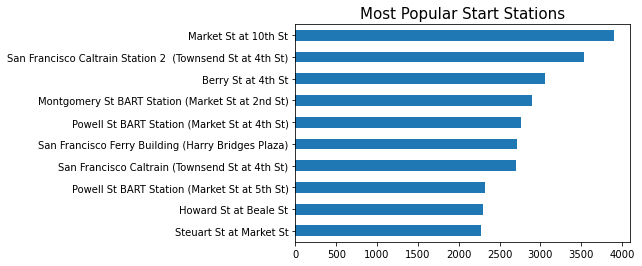

In [121]:
#Start station
plt.title('Most Popular Start Stations', fontsize=15)
df.start_station_name.value_counts(ascending=True).tail(10).plot.barh()

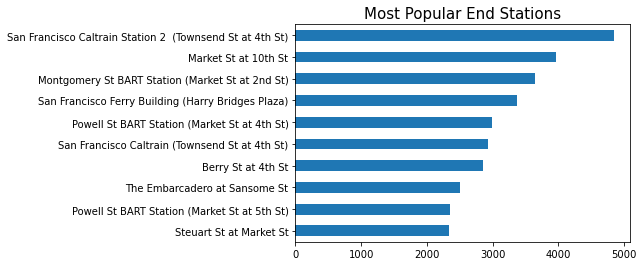

In [122]:
#End Station
plt.title('Most Popular End Stations', fontsize=15)
df.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
From the plot shown above, it is clear that most people prefer to use bicycles for short-distance journeys (around 10 mins).

>
Several transformations were carried out to make data types consistent with the required formats.
 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The conversion of the birth year yields the age by subtracting the year from the current year. Age provides a better impression of the reliance of trip duration, hence this step is taken. The start station and end station are also plotted in a larger plot since it provides a clearer picture of the bike traffic at various stations. The mean values for member birth year was used to fill the missing values.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### First, let's examine the relationship between trip length and age.

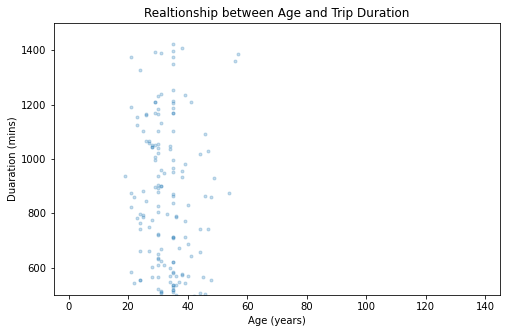

In [32]:
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_min'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 1500])
label('Age (years)','Duaration (mins)', 'Realtionship between Age and Trip Duration')

> Let's trim the plot till those numbers as the majority of the durations are under 1500 mins and the average age is under 60.

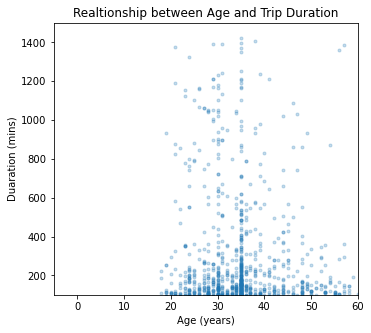

In [33]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_min'], alpha = 0.25, marker = '.' )
plt.axis([-5, 60, 100, 1500])
label('Age (years)','Duaration (mins)', 'Realtionship between Age and Trip Duration')

> These scatter plots show that people between the ages of 30 and 40 ride bikes the most often. Younger participants, approximately 35 years old, clock longer periods of time.

In [34]:
#duration dependency on start station and end station
sorted(df.start_station_id.unique())
t = []

all_start_station_ids = sorted(df.start_station_id.unique())
for x in all_start_station_ids :
    t.append(df[df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

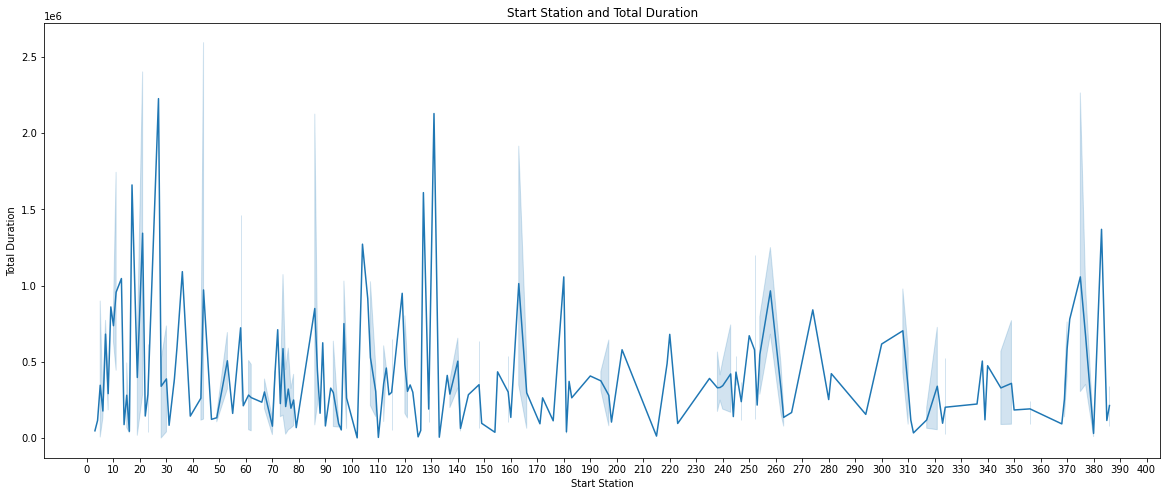

In [35]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
label('Start Station','Total Duration','Start Station and Total Duration')

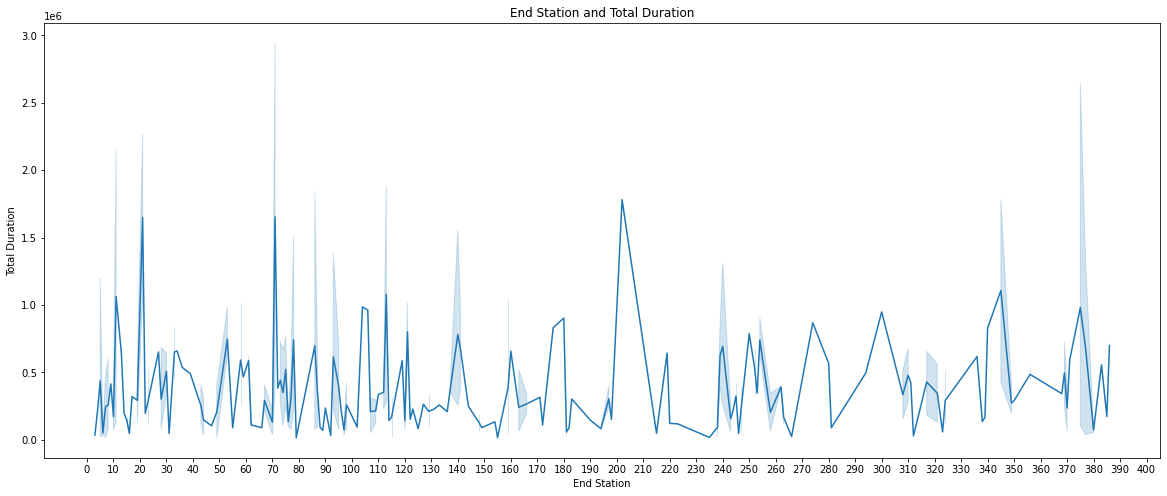

In [37]:
t = []

all_end_station_ids = sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    t.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
label('End Station','Total Duration','End Station and Total Duration')

> By examining these plots, you can observe that for certain stations, the trip duration increases as the start station and, for some stations, at the end station the trip duration increases. This allows us to determine which stations mark the beginning of longer trips and which stations mark their conclusion.

#### Let's now examine how User Type affect the length of trips.

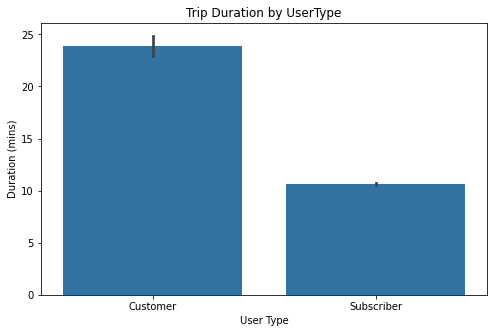

In [38]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
label('User Type','Duration (mins)', 'Trip Duration by UserType')

>  Here we can see overall that higher number of customers are taking longer trips then compared to subscribers

#### Does service per day usage depend on the usertype?

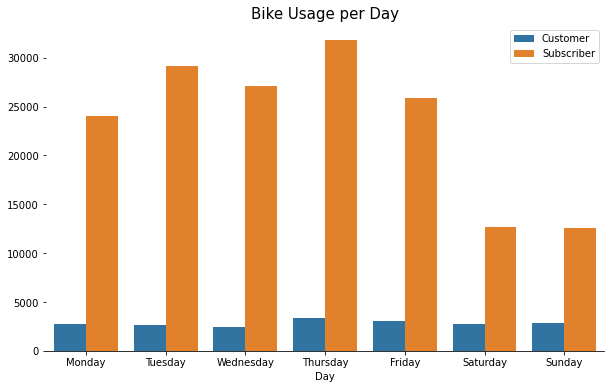

In [129]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Day', fontsize=15)
chart = sb.countplot(data=df, x='day', order=day_name, hue='user_type')
chart.set(xlabel='Day', ylabel='')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> This service is used more frequently by Subscribers during the weekday and less frequently on the weekends. Customers' use of bicycles has been mostly consistent, displaying minimal variation during the week and on the weekends. The most popular days for subscribers to use the bike service are Tuesday and Thursday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The service has more subscribers during the weekdays particularly on thurdays with  and tuesdays.
> Customers are consistently under 5000 throughout the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that there is a way to see what stations show longer trip durations and use that to determine the stations for which to focus on improvements.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### First, we look at the usage of the service by day of the week and usertype

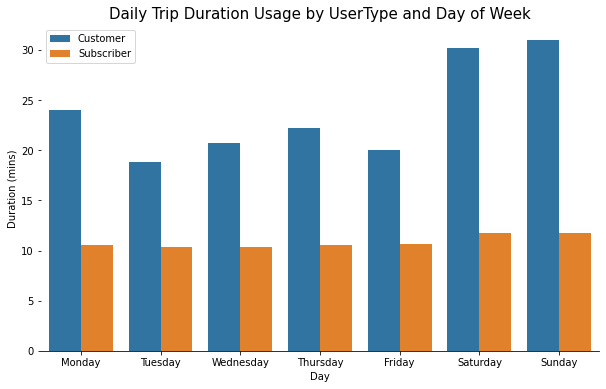

In [130]:
#trip duration
plt.figure(figsize=(10,6))
plt.title('Daily Trip Duration Usage by UserType and Day of Week', fontsize=15)
chart = sb.barplot(data=df, x='day', y='duration_min', order=day_name, hue='user_type', ci=None)

chart.set(xlabel='Day', ylabel='Duration (mins)')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> From the plot above, we can see that there is peak usage on weekends for customers, and the daily usage for subscribers is relatively constant under 10 min, with the weekend being the only time subscribers clock over 10 min in trip duration.

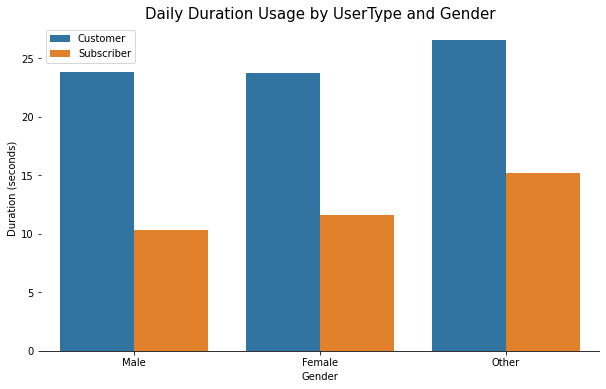

In [131]:
plt.figure(figsize=(10,6))
plt.title('Daily Duration Usage by UserType and Gender', fontsize=15)
chart = sb.barplot(data=df, x='member_gender', y='duration_min', order=member_type, hue='user_type', ci=None)

chart.set(xlabel='Gender', ylabel='Duration (seconds)')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

> We can see that amongst subscribers and customers, there are more unknown genders who clock higher trip durations for the service. The female and male customers clock almost the same trip duration for the service, and it is not very different for their counterparts who are subscribers to the bike sharing service. In cnclusion,we can see thatthe gender types use the service in relatively equal capacity regardless of their membership category.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes. The way this service is used depends on the type of user. There are quite a few variations here and there, including:
- The duration of usage
    >  Customers often take longer trips, whereas subscribers typically take shorter ones.
- Use with the Weekdays
    > While subscribers utilise the service fairly consistently during the week, customers use it most frequently on the weekends.

### Were there any interesting or surprising interactions between features?

> I noticed the gender group classified as 'other' had the most trip time when compared to the ones male and female. It would be important understand what the gender group is made up of.

## Conclusions
> The service have more subscribers than customers. <br>
> Thurdsay have the most number of users reaching over 30000 users in one day. <br>
> There are more male riders than female riders. <br>
> The average trip duration was about 12minutes. <br>
> Younger riders aged 30 to 40 clocked the highest trip durations for the month of february.


In [143]:
# Export dataframe to CSV file for slide deck

# Code
df.to_csv('df_slide.csv', index=None)
df = pd.read_csv('df_slide.csv')

# Test
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,duration_min,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,869.750000,38
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,1984,Male,No,Thursday,708.683333,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,1030.900000,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,608.166667,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,26.416667,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183240,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,Friday,8.000000,26
183241,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,Friday,5.216667,38
183242,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,Friday,2.350000,32
183243,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,Friday,2.316667,34
